## Colorado Soil Temperature Data

In [1]:
# Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Soil temperature and moisture data for La Junta, CO
# Data Source: U.S Climate Reference Network (USCRN) | https://data.noaa.gov/onestop/collections/details/536970fd-dd4d-4628-b1d9-38c67ebed636?f=science:Land%20Surface%20%3E%20Soils%20%3E%20Soil%20Temperature&eg=1
# Data Download Link: https://www.ncei.noaa.gov/data/us-climate-reference-network/access/derived-products/soil/soilanom/
# Data Description: https://www.ncei.noaa.gov/data/us-climate-reference-network/doc/derived-products/soilanom01-readme.txt

df_la_junta = pd.read_csv('data/soiltemp_soilmoisture_data/La_Junta.csv')

# Selecting relevant columns
# Selecting Soil Moisture Volumetric Water Content (SMVWC) and Soil Temperature (ST) at 20, 50, and 100 cm depths

df_la_junta = df_la_junta[['DATE_TIME', 'SMVWC_20_CM', 'ST_20_CM', 'SMVWC_50_CM', 'ST_50_CM', 'SMVWC_100_CM', 'ST_100_CM']]

# Converting DATE_TIME from YYYYMMDDHH to YYYY-MM-DD format
df_la_junta['DATE_TIME'] = pd.to_datetime(df_la_junta['DATE_TIME'], format='%Y%m%d%H')

# Extracting date from datetime
df_la_junta['DATE_TIME'] = df_la_junta['DATE_TIME'].dt.date

# Dropping rows all values as NaN apart from DATE_TIME
df_la_junta = df_la_junta.dropna(subset=['SMVWC_20_CM', 'ST_20_CM', 'SMVWC_50_CM', 'ST_50_CM', 'SMVWC_100_CM', 'ST_100_CM'], how='all')

# Grouping by DATE_TIME and taking the mean of the values
# As the originaal DATE_TIME column which had HH also now has been converted to date, the mean of the values for each date will be taken

df_la_junta = df_la_junta.groupby('DATE_TIME').mean().reset_index()

# Renaming the columns for easier reference
# sm: soil moisture
# st: Soil Temperature

df_la_junta.rename(columns={'DATE_TIME': 'date', 'SMVWC_20_CM': 'sm_20cm', 'ST_20_CM': 'st_20cm',
                            'SMVWC_50_CM': 'sm_50cm', 'ST_50_CM': 'st_50cm',
                            'SMVWC_100_CM': 'sm_100cm', 'ST_100_CM': 'st_100cm'}, inplace=True)

df_la_junta.head()


,date,sm_20cm,st_20cm,sm_50cm,st_50cm,sm_100cm,st_100cm
0,2009-11-21,0.220833,5.650000,0.195500,7.166667,0.149250,10.391667
1,2009-11-22,0.218417,4.229167,0.196917,6.437500,0.149292,10.175000
2,2009-11-23,0.217542,4.245833,0.198458,6.087500,0.148500,5.775000
3,2009-11-24,0.215250,3.441667,0.198792,5.758333,0.147333,9.700000
4,2009-11-25,0.214167,2.812500,0.198583,5.295833,0.147750,9.454167


In [3]:
# Summary of the data
df_la_junta[['sm_20cm', 'st_20cm', 'sm_50cm', 'st_50cm', 'sm_100cm', 'st_100cm']].describe()

,sm_20cm,st_20cm,sm_50cm,st_50cm,sm_100cm,st_100cm
count,4932.000000,5065.000000,5065.000000,5065.000000,5065.000000,5065.000000
mean,0.137028,13.801507,0.136847,13.904748,0.168684,13.952919
std,0.041885,9.399180,0.035568,8.221388,0.026687,6.304113
min,0.055273,-2.229167,0.085958,0.666667,0.131083,0.000000
25%,0.111198,4.608333,0.112417,6.037500,0.154375,7.820833
50%,0.128083,13.695833,0.131250,13.539130,0.165375,13.479167
75%,0.163125,23.254167,0.146000,22.204167,0.178708,20.420833
max,0.303000,31.129167,0.333333,28.658333,0.422292,25.058333


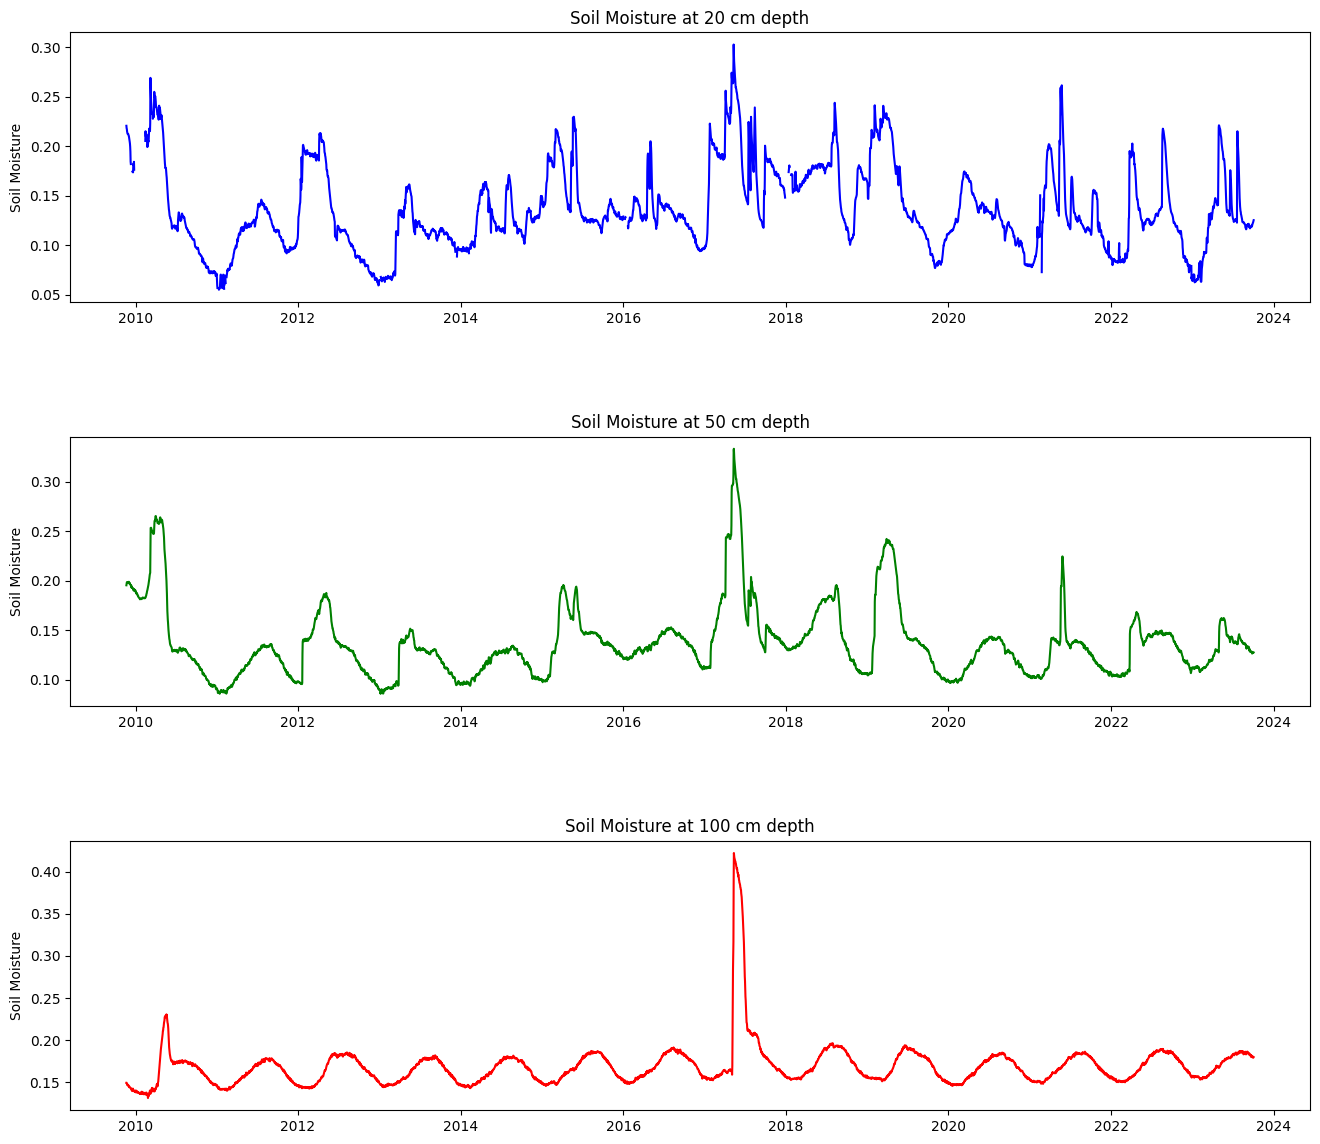

In [4]:
# Plotting time series for soil moisture at different depths

# creating a 3x1 grid of subplots and create time series plots for soil moisture at different depths
fig, ax = plt.subplots(3, 1, figsize=(16, 14))

# adjusting the space between the subplots
plt.subplots_adjust(hspace=0.5)

ax[0].plot(df_la_junta['date'], df_la_junta['sm_20cm'], color='blue')
ax[0].set_title('Soil Moisture at 20 cm depth')
ax[0].set_ylabel('Soil Moisture')

ax[1].plot(df_la_junta['date'], df_la_junta['sm_50cm'], color='green')
ax[1].set_title('Soil Moisture at 50 cm depth')
ax[1].set_ylabel('Soil Moisture')

ax[2].plot(df_la_junta['date'], df_la_junta['sm_100cm'], color='red')
ax[2].set_title('Soil Moisture at 100 cm depth')
ax[2].set_ylabel('Soil Moisture')

plt.show()

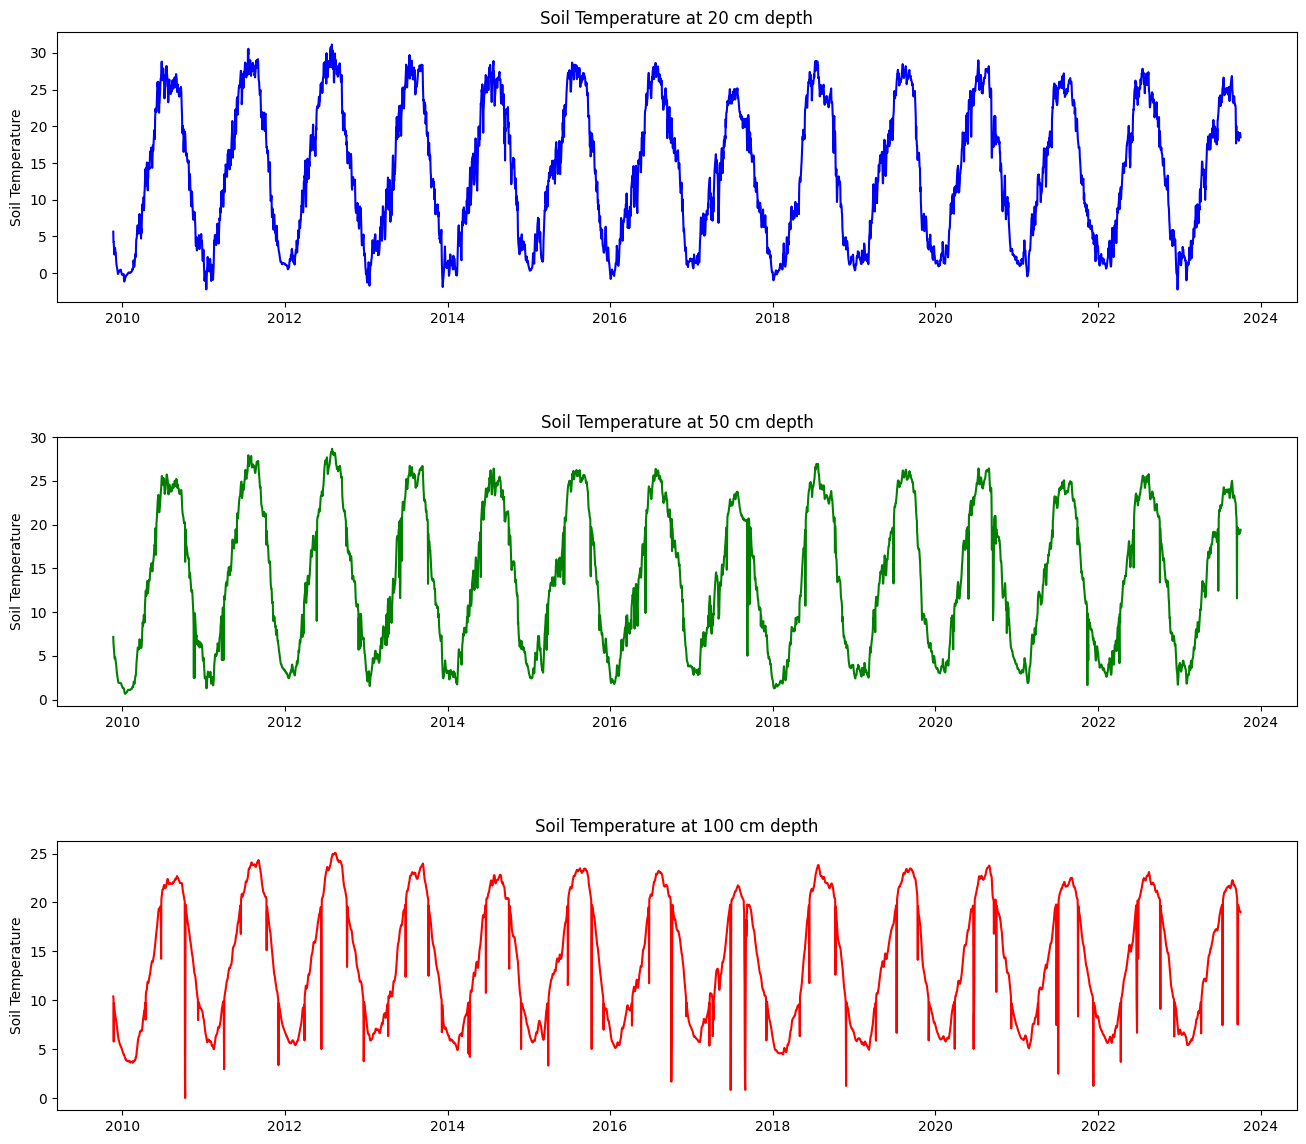

In [5]:
# Plotting time series for soil temperature at different depths

# creating a 3x1 grid of subplots and create time series plots for soil moisture at different depths
fig, ax = plt.subplots(3, 1, figsize=(16, 14))

# adjusting the space between the subplots
plt.subplots_adjust(hspace=0.5)

ax[0].plot(df_la_junta['date'], df_la_junta['st_20cm'], color='blue')
ax[0].set_title('Soil Temperature at 20 cm depth')
ax[0].set_ylabel('Soil Temperature')

ax[1].plot(df_la_junta['date'], df_la_junta['st_50cm'], color='green')
ax[1].set_title('Soil Temperature at 50 cm depth')
ax[1].set_ylabel('Soil Temperature')

ax[2].plot(df_la_junta['date'], df_la_junta['st_100cm'], color='red')
ax[2].set_title('Soil Temperature at 100 cm depth')
ax[2].set_ylabel('Soil Temperature')

plt.show()

In [6]:
# Saving the dataframes to parquet file for future use

df_la_junta.to_parquet('data/soiltemp_soilmoisture_data/soil_temp_moisture.parquet', index=False)